# Capstone Project

### Table of Contents

---


- [Importing the Paris Data](#Getting-the-Paris-Neighbourhoods)
- [Importing the London Data](#Getting-the-London-neighbourhoods)
- [Exploring the Fourquare data for Paris](#Exploring-the-Fourquare-data-for-Paris)
- [Clusteing the neighbourhoods in Paris](#Now-lets-cluster-the-neighbourhoods-in-Paris)
- [Exploring the Fourquare data for London](#Exploring-the-Fourquare-data-for-London)

In [1]:
# get my foursquare keys from file
with open('./assets/client_id.txt', 'r') as file:
    CLIENT_ID = file.read()
    
with open('./assets/client_secret.txt', 'r') as file:
    CLIENT_SECRET = file.read()

In [2]:
import pandas as pd
import numpy as np
import folium

## Getting the Paris Neighbourhoods

### import from a file with the wikipedia data

In [3]:
paris_neighbourhoods = pd.read_csv('./assets/paris_neighbourhoods.csv')

In [4]:
paris_neighbourhoods.head(4)

,Name,Latitude,Longitude
0,1st,48.860000,2.341111
1,2nd,48.869167,2.340556
2,3rd,48.863819,2.361658
3,4th,48.855556,2.355556


### map out the districts

In [5]:
# create map of New York using latitude and longitude values
map_paris = folium.Map(location=[48.860000, 2.341111], zoom_start=10)

# add markers to map
for lat, lng, neighbourhood in zip(paris_neighbourhoods['Latitude'], paris_neighbourhoods['Longitude'], paris_neighbourhoods['Name']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris)  
    
map_paris

## Getting the London neighbourhoods

### here we're going to scape the data from wikipedia

In [6]:
url = 'https://en.wikipedia.org/wiki/List_of_areas_of_London'

In [7]:
import requests
from bs4 import BeautifulSoup

In [8]:
# read the data into a dataframe with pandas method
london_data = requests.get(url)
london_data = pd.read_html(london_data.text)
london_neighbourhoods = london_data[1]
london_neighbourhoods

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728
...,...,...,...,...,...,...
526,Woolwich,Greenwich,LONDON,SE18,020,TQ435795
527,Worcester Park,"Sutton, Kingston upon Thames",WORCESTER PARK,KT4,020,TQ225655
528,Wormwood Scrubs,Hammersmith and Fulham,LONDON,W12,020,TQ225815
529,Yeading,Hillingdon,HAYES,UB4,020,TQ115825


In [9]:
data  = requests.get(url).text

In [10]:
# now we switch to BeautifulSoup for the more complex scraping
soup = BeautifulSoup(data,"html5lib")

In [11]:
# get the table we need
districts = soup.find_all('table')[1]

In [12]:
# grab the entries
entries = districts.find_all('tr')

In [13]:
# find the element with the lat, long data
a_elements = []
for i in range(len(entries)):
    if i==0:
        pass
    else:
        element = entries[i].find_all('a', {"class": "external text"})
        a_elements.append(element)

In [14]:
len(a_elements)

531

In [15]:
# clean them up a bit
a_elements_clean = []
for a in a_elements:
    if len(a) > 0:
        a_elements_clean.append(a[0])
    else:
        a_elements_clean.append(np.nan)


In [16]:
london_neighbourhoods['a_elements'] = a_elements_clean

In [17]:
london_neighbourhoods.head(5)

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref,a_elements
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785,[TQ465785]
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805,[TQ205805]
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645,[TQ375645]
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665,[TQ345665]
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728,[TQ478728]


In [18]:
london_neighbourhoods.loc[0,'a_elements']

<a class="external text" href="https://geohack.toolforge.org/geohack.php?pagename=List_of_areas_of_London&amp;params=51.48648031512_N_0.10859224316653_E_region:GB" rel="nofollow">TQ465785</a>

In [19]:
london_neighbourhoods.isnull().sum()

Location             0
London borough       0
Post town            0
Postcode district    0
Dial code            0
OS grid ref          2
a_elements           2
dtype: int64

In [20]:
# drop the districts without lat,long data
london_neighbourhoods.dropna(inplace=True)

In [21]:
# get the urls with the lat,long data from the elements
hrefs = []
for a in london_neighbourhoods['a_elements']:
    hrefs.append(a['href'])

In [22]:
london_neighbourhoods['hrefs'] = hrefs

In [23]:
london_neighbourhoods

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref,a_elements,hrefs
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785,[TQ465785],https://geohack.toolforge.org/geohack.php?page...
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805,[TQ205805],https://geohack.toolforge.org/geohack.php?page...
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645,[TQ375645],https://geohack.toolforge.org/geohack.php?page...
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665,[TQ345665],https://geohack.toolforge.org/geohack.php?page...
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728,[TQ478728],https://geohack.toolforge.org/geohack.php?page...
...,...,...,...,...,...,...,...,...
526,Woolwich,Greenwich,LONDON,SE18,020,TQ435795,[TQ435795],https://geohack.toolforge.org/geohack.php?page...
527,Worcester Park,"Sutton, Kingston upon Thames",WORCESTER PARK,KT4,020,TQ225655,[TQ225655],https://geohack.toolforge.org/geohack.php?page...
528,Wormwood Scrubs,Hammersmith and Fulham,LONDON,W12,020,TQ225815,[TQ225815],https://geohack.toolforge.org/geohack.php?page...
529,Yeading,Hillingdon,HAYES,UB4,020,TQ115825,[TQ115825],https://geohack.toolforge.org/geohack.php?page...


In [24]:
hrefs[0]

'https://geohack.toolforge.org/geohack.php?pagename=List_of_areas_of_London&params=51.48648031512_N_0.10859224316653_E_region:GB'

In [25]:
# now we extract the lat,long data from the url
lat, lng = [], []
for url in hrefs:
    latlng = url[slice(82, len(url)-10)].split('_N_')
    lat.append(latlng[0])
    lng.append(latlng[1])

In [26]:
# adding a minus to all longitudes to the west
for i,cdin in enumerate(lng):
    if cdin[-1] == 'W':
        lng[i] = '-' + cdin
    else:
        pass

In [27]:
# removing the useless characters on the end
for i,cdin in enumerate(lng):
    lng[i] = cdin[:-2]

In [28]:
london_neighbourhoods['Latitude'] = lat
london_neighbourhoods['Longitude'] = lng

In [29]:
london_neighbourhoods.head(5)

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref,a_elements,hrefs,Latitude,Longitude
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785,[TQ465785],https://geohack.toolforge.org/geohack.php?page...,51.48648031512,0.10859224316653
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805,[TQ205805],https://geohack.toolforge.org/geohack.php?page...,51.51058775877,-0.26498902668911
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645,[TQ375645],https://geohack.toolforge.org/geohack.php?page...,51.362931128458,-0.026373738779412
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665,[TQ345665],https://geohack.toolforge.org/geohack.php?page...,51.381621885559,-0.068682165650808
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728,[TQ478728],https://geohack.toolforge.org/geohack.php?page...,51.434925966837,0.12492137518833


In [30]:
london_neighbourhoods.drop(columns=['Post town', 'OS grid ref', 'a_elements', 'hrefs'], inplace=True)

In [31]:
london_neighbourhoods

,Location,London borough,Postcode district,Dial code,Latitude,Longitude
0,Abbey Wood,"Bexley, Greenwich [7]",SE2,020,51.48648031512,0.10859224316653
1,Acton,"Ealing, Hammersmith and Fulham[8]","W3, W4",020,51.51058775877,-0.26498902668911
2,Addington,Croydon[8],CR0,020,51.362931128458,-0.026373738779412
3,Addiscombe,Croydon[8],CR0,020,51.381621885559,-0.068682165650808
4,Albany Park,Bexley,"DA5, DA14",020,51.434925966837,0.12492137518833
...,...,...,...,...,...,...
526,Woolwich,Greenwich,SE18,020,51.496234488147,0.065821080670888
527,Worcester Park,"Sutton, Kingston upon Thames",KT4,020,51.375348602793,-0.2413698232129
528,Wormwood Scrubs,Hammersmith and Fulham,W12,020,51.51914529563,-0.2358364367502
529,Yeading,Hillingdon,UB4,020,51.530409425123,-0.39398974116165


In [32]:
# create map of New York using latitude and longitude values
map_london = folium.Map(location=[51.506932, -0.128211], zoom_start=10)

# add markers to map
for lat, lng, neighbourhood in zip(london_neighbourhoods['Latitude'], london_neighbourhoods['Longitude'], london_neighbourhoods['Location']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

## Exploring the Fourquare data for Paris

In [33]:
neighbourhood_latitude = paris_neighbourhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighbourhood_longitude = paris_neighbourhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighbourhood_name = paris_neighbourhoods.loc[0, 'Name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of 1st are 48.86, 2.341111.


### create the url to grab data about the 1st district

In [34]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
VERSION = '20180605'


radius = 500 # define radius



# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION,
    neighbourhood_latitude,
    neighbourhood_longitude,
    radius,
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=TSP5T1T2FINTOY1WPFZYVYZKITHH5DLY4IB0WZLNVOU5X1MV&client_secret=0PQETQE4K1WXMN4TKY4L2DLOXJRPK2TBDPQWZHSZ2EDINBHE&v=20180605&ll=48.86,2.341111&radius=500&limit=100'

In [35]:
results = requests.get(url).json()

In [36]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### put the data into a DF

In [37]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,Cour Carrée du Louvre,Pedestrian Plaza,48.860360,2.338543
1,Place du Louvre,Plaza,48.859841,2.340822
2,Église Saint-Germain-l'Auxerrois (Église Saint...,Church,48.859520,2.341306
3,La Régalade Saint-Honoré,French Restaurant,48.861620,2.341749
4,Enza & Famiglia,Italian Restaurant,48.861191,2.343449
5,Boutique yam'Tcha,Chinese Restaurant,48.861710,2.342380
6,Le Fumoir,Cocktail Bar,48.860424,2.340868
7,Hôtel Maison Albar Paris Céline,Hotel,48.860552,2.344259
8,Kong,French Restaurant,48.859206,2.343049
9,Yam'Tcha Restaurant,French Restaurant,48.861462,2.341898


In [38]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

78 venues were returned by Foursquare.


### create a function to loop through all districts and grab the data

In [39]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [40]:
paris_venues = getNearbyVenues(names=paris_neighbourhoods['Name'],
                                   latitudes=paris_neighbourhoods['Latitude'],
                                   longitudes=paris_neighbourhoods['Longitude']
                                  )

1st
2nd
3rd
4th
5th
6th
7th
8th
9th
10th
11th
12th
13th
14th
15th
16th
17th
18th
19th
20th


In [41]:
print(paris_venues.shape)
paris_venues.head()

(1396, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1st,48.86,2.341111,Cour Carrée du Louvre,48.860360,2.338543,Pedestrian Plaza
1,1st,48.86,2.341111,Place du Louvre,48.859841,2.340822,Plaza
2,1st,48.86,2.341111,Église Saint-Germain-l'Auxerrois (Église Saint...,48.859520,2.341306,Church
3,1st,48.86,2.341111,La Régalade Saint-Honoré,48.861620,2.341749,French Restaurant
4,1st,48.86,2.341111,Enza & Famiglia,48.861191,2.343449,Italian Restaurant


In [42]:
paris_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
10th,100,100,100,100,100,100
11th,84,84,84,84,84,84
12th,44,44,44,44,44,44
13th,50,50,50,50,50,50
14th,52,52,52,52,52,52
15th,50,50,50,50,50,50
16th,35,35,35,35,35,35
17th,46,46,46,46,46,46
18th,53,53,53,53,53,53


In [43]:
print('There are {} uniques categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 210 uniques categories.


### one hot encoding to enable analysis

In [44]:
# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()

,Neighborhood,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,1st,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
paris_onehot.shape

(1396, 211)

In [46]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped

,Neighborhood,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,10th,0.00,0.000000,0.02,0.000000,0.00,0.000000,0.00,0.010000,0.000000,...,0.010000,0.00,0.020000,0.000000,0.00,0.010000,0.000000,0.020000,0.000000,0.000000
1,11th,0.00,0.011905,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.011905,...,0.000000,0.00,0.023810,0.000000,0.00,0.023810,0.035714,0.000000,0.011905,0.000000
2,12th,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,...,0.022727,0.00,0.000000,0.000000,0.00,0.022727,0.022727,0.000000,0.000000,0.000000
3,13th,0.00,0.000000,0.00,0.020000,0.00,0.000000,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.060000,0.000000,0.000000,0.000000,0.000000
4,14th,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,...,0.000000,0.00,0.019231,0.000000,0.00,0.019231,0.019231,0.019231,0.000000,0.000000
5,15th,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.000000,0.000000
6,16th,0.00,0.000000,0.00,0.028571,0.00,0.000000,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
7,17th,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.021739,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.021739
8,18th,0.00,0.000000,0.00,0.000000,0.00,0.018868,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.037736,0.018868,0.000000,0.000000,0.000000
9,19th,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.030303,0.000000,0.000000,0.000000,0.000000


In [47]:
paris_grouped.shape

(20, 211)

In [48]:
num_top_venues = 5

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----10th----
               venue  freq
0  French Restaurant  0.10
1             Bistro  0.05
2             Bakery  0.04
3  Indian Restaurant  0.04
4        Pizza Place  0.04


----11th----
                venue  freq
0   French Restaurant  0.08
1  Italian Restaurant  0.06
2              Bistro  0.05
3        Cocktail Bar  0.05
4         Supermarket  0.05


----12th----
                venue  freq
0               Hotel  0.11
1              Bistro  0.11
2   French Restaurant  0.07
3  Chinese Restaurant  0.05
4         Supermarket  0.05


----13th----
                   venue  freq
0        Thai Restaurant  0.08
1                  Hotel  0.08
2      French Restaurant  0.06
3                    Bar  0.06
4  Vietnamese Restaurant  0.06


----14th----
                venue  freq
0   French Restaurant  0.29
1  Italian Restaurant  0.06
2              Bakery  0.06
3               Hotel  0.06
4                 Bar  0.06


----15th----
                 venue  freq
0    French Restaurant  0.16
1 

In [49]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [50]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10th,French Restaurant,Bistro,Japanese Restaurant,Indian Restaurant,Bakery,Pizza Place,Café,Bar,Seafood Restaurant,Burger Joint
1,11th,French Restaurant,Italian Restaurant,Cocktail Bar,Bistro,Supermarket,Bakery,Restaurant,Wine Bar,Café,Pastry Shop
2,12th,Hotel,Bistro,French Restaurant,Chinese Restaurant,Supermarket,Convenience Store,Creperie,Electronics Store,Portuguese Restaurant,Coffee Shop
3,13th,Thai Restaurant,Hotel,Vietnamese Restaurant,French Restaurant,Bar,Indian Restaurant,Italian Restaurant,Asian Restaurant,Bakery,Park
4,14th,French Restaurant,Italian Restaurant,Hotel,Bar,Bakery,Restaurant,Garden,Bistro,Sushi Restaurant,Brasserie
5,15th,French Restaurant,Italian Restaurant,Hotel,Coffee Shop,Lebanese Restaurant,Supermarket,Japanese Restaurant,Bar,Park,Indie Movie Theater
6,16th,French Restaurant,Bakery,Hotel,Restaurant,Café,Seafood Restaurant,Garden,Spa,Bus Stop,Flower Shop
7,17th,French Restaurant,Italian Restaurant,Bakery,Hotel,Bar,Bistro,Pastry Shop,Sandwich Place,Restaurant,Concert Hall
8,18th,French Restaurant,Bar,Café,Italian Restaurant,Vietnamese Restaurant,Restaurant,Pizza Place,Theater,Convenience Store,Deli / Bodega
9,19th,French Restaurant,Bar,Italian Restaurant,Supermarket,Restaurant,Pool,Plaza,Café,Seafood Restaurant,Moroccan Restaurant


## Now lets cluster the neighbourhoods in Paris

#### first lets find the right number of k for the kmeans

In [51]:
from sklearn.cluster import KMeans

In [52]:
paris_grouped_clustering_test = paris_grouped.drop('Neighborhood', 1)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, random_state=0).fit(paris_grouped_clustering_test)
    Sum_of_squared_distances.append(km.inertia_)

In [53]:
import matplotlib.pyplot as plt

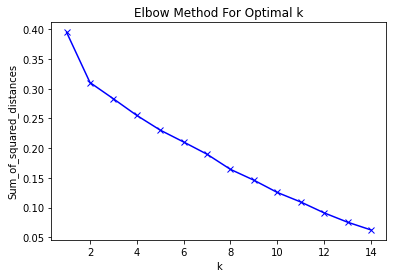

In [54]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [55]:
# set number of clusters
kclusters = 4

paris_grouped_clustering = paris_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 3, 0, 2, 2, 0, 0])

In [56]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

paris_merged = paris_neighbourhoods

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
paris_merged = paris_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Name')

paris_merged.head(20) # check the last columns!

,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1st,48.860000,2.341111,2,French Restaurant,Bar,Plaza,Café,Hotel,Clothing Store,Museum,Park,Chinese Restaurant,Pizza Place
1,2nd,48.869167,2.340556,1,French Restaurant,Hotel,Japanese Restaurant,Cocktail Bar,Wine Bar,Bistro,Plaza,Coffee Shop,Café,Bakery
2,3rd,48.863819,2.361658,1,Wine Bar,Art Gallery,Bistro,Cocktail Bar,French Restaurant,Hotel,Coffee Shop,Bakery,Chinese Restaurant,Café
3,4th,48.855556,2.355556,2,French Restaurant,Clothing Store,Ice Cream Shop,Pastry Shop,Hotel,Plaza,Gay Bar,Bakery,Bar,Pedestrian Plaza
4,5th,48.847222,2.344444,2,French Restaurant,Hotel,Bakery,Pub,Bar,Italian Restaurant,Indie Movie Theater,Plaza,Ice Cream Shop,Café
5,6th,48.850556,2.332222,2,French Restaurant,Italian Restaurant,Plaza,Seafood Restaurant,Hotel,Bakery,Clothing Store,Steakhouse,Garden,Tailor Shop
6,7th,48.859167,2.312778,3,French Restaurant,Hotel,Plaza,Italian Restaurant,History Museum,Café,Beer Garden,Bistro,Bar,Bakery
7,8th,48.874167,2.311111,3,French Restaurant,Hotel,Art Gallery,Café,Bakery,Middle Eastern Restaurant,Salad Place,Bar,Italian Restaurant,Hotel Bar
8,9th,48.878333,2.336944,2,French Restaurant,Hotel,Bistro,Wine Bar,Gym / Fitness Center,Salad Place,Japanese Restaurant,Bar,Coffee Shop,Cocktail Bar
9,10th,48.875556,2.357778,1,French Restaurant,Bistro,Japanese Restaurant,Indian Restaurant,Bakery,Pizza Place,Café,Bar,Seafood Restaurant,Burger Joint


In [57]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [58]:
# create map
map_clusters = folium.Map(location=[48.860000, 2.341111], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['Name'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### cluster 1

In [59]:
paris_merged.loc[paris_merged['Cluster Labels'] == 0, paris_merged.columns[[0] + list(range(4, paris_merged.shape[1]))]]

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,15th,French Restaurant,Italian Restaurant,Hotel,Coffee Shop,Lebanese Restaurant,Supermarket,Japanese Restaurant,Bar,Park,Indie Movie Theater
17,18th,French Restaurant,Bar,Café,Italian Restaurant,Vietnamese Restaurant,Restaurant,Pizza Place,Theater,Convenience Store,Deli / Bodega
18,19th,French Restaurant,Bar,Italian Restaurant,Supermarket,Restaurant,Pool,Plaza,Café,Seafood Restaurant,Moroccan Restaurant


#### cluster 2

In [60]:
paris_merged.loc[paris_merged['Cluster Labels'] == 1, paris_merged.columns[[0] + list(range(4, paris_merged.shape[1]))]]

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,2nd,French Restaurant,Hotel,Japanese Restaurant,Cocktail Bar,Wine Bar,Bistro,Plaza,Coffee Shop,Café,Bakery
2,3rd,Wine Bar,Art Gallery,Bistro,Cocktail Bar,French Restaurant,Hotel,Coffee Shop,Bakery,Chinese Restaurant,Café
9,10th,French Restaurant,Bistro,Japanese Restaurant,Indian Restaurant,Bakery,Pizza Place,Café,Bar,Seafood Restaurant,Burger Joint
10,11th,French Restaurant,Italian Restaurant,Cocktail Bar,Bistro,Supermarket,Bakery,Restaurant,Wine Bar,Café,Pastry Shop
11,12th,Hotel,Bistro,French Restaurant,Chinese Restaurant,Supermarket,Convenience Store,Creperie,Electronics Store,Portuguese Restaurant,Coffee Shop
12,13th,Thai Restaurant,Hotel,Vietnamese Restaurant,French Restaurant,Bar,Indian Restaurant,Italian Restaurant,Asian Restaurant,Bakery,Park
19,20th,French Restaurant,Bakery,Bar,Japanese Restaurant,Plaza,Bistro,Café,Italian Restaurant,Park,Restaurant


#### cluster 3

In [61]:
paris_merged.loc[paris_merged['Cluster Labels'] == 2, paris_merged.columns[[0] + list(range(4, paris_merged.shape[1]))]]

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1st,French Restaurant,Bar,Plaza,Café,Hotel,Clothing Store,Museum,Park,Chinese Restaurant,Pizza Place
3,4th,French Restaurant,Clothing Store,Ice Cream Shop,Pastry Shop,Hotel,Plaza,Gay Bar,Bakery,Bar,Pedestrian Plaza
4,5th,French Restaurant,Hotel,Bakery,Pub,Bar,Italian Restaurant,Indie Movie Theater,Plaza,Ice Cream Shop,Café
5,6th,French Restaurant,Italian Restaurant,Plaza,Seafood Restaurant,Hotel,Bakery,Clothing Store,Steakhouse,Garden,Tailor Shop
8,9th,French Restaurant,Hotel,Bistro,Wine Bar,Gym / Fitness Center,Salad Place,Japanese Restaurant,Bar,Coffee Shop,Cocktail Bar
15,16th,French Restaurant,Bakery,Hotel,Restaurant,Café,Seafood Restaurant,Garden,Spa,Bus Stop,Flower Shop
16,17th,French Restaurant,Italian Restaurant,Bakery,Hotel,Bar,Bistro,Pastry Shop,Sandwich Place,Restaurant,Concert Hall


#### cluster 4

In [62]:
paris_merged.loc[paris_merged['Cluster Labels'] == 3, paris_merged.columns[[0] + list(range(4, paris_merged.shape[1]))]]

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,7th,French Restaurant,Hotel,Plaza,Italian Restaurant,History Museum,Café,Beer Garden,Bistro,Bar,Bakery
7,8th,French Restaurant,Hotel,Art Gallery,Café,Bakery,Middle Eastern Restaurant,Salad Place,Bar,Italian Restaurant,Hotel Bar
13,14th,French Restaurant,Italian Restaurant,Hotel,Bar,Bakery,Restaurant,Garden,Bistro,Sushi Restaurant,Brasserie


## Exploring the Fourquare data for London

In [63]:
neighbourhood_latitude = london_neighbourhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighbourhood_longitude = london_neighbourhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighbourhood_name = london_neighbourhoods.loc[0, 'Location'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of Abbey Wood are 51.48648031512, 0.10859224316653.


### create the url to grab data about the 1st district

In [64]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
VERSION = '20180605'


radius = 500 # define radius



# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION,
    neighbourhood_latitude,
    neighbourhood_longitude,
    radius,
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=TSP5T1T2FINTOY1WPFZYVYZKITHH5DLY4IB0WZLNVOU5X1MV&client_secret=0PQETQE4K1WXMN4TKY4L2DLOXJRPK2TBDPQWZHSZ2EDINBHE&v=20180605&ll=51.48648031512,0.10859224316653&radius=500&limit=100'

In [65]:
results = requests.get(url).json()

In [66]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### put the data into a DF

In [67]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,Co-op Food,Grocery Store,51.487490,0.113751
1,S. Higgins Newsagents,Newsagent,51.487476,0.112717
2,Othalias Security Services U K,IT Services,51.483521,0.105464
3,Meghna Tandoori,Indian Restaurant,51.485709,0.101681


In [68]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

4 venues were returned by Foursquare.


### create a function to loop through all districts and grab the data

In [69]:
# temp id and secret taken from github roshangrewal
CLIENT_ID = 'DPBYY4JUY3DU20ALPSUV4ONY2K1GOJJKJ1NIHBB32XEMOVYY'
CLIENT_SECRET = '1MV443TYEP4HUO0WDUW5NQ5W10L2Y4G05NWG11WIR3NUGC5B' 

In [70]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()
        results = results["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [73]:
london_venues = getNearbyVenues(names=london_neighbourhoods['Location'],
                                   latitudes=london_neighbourhoods['Latitude'],
                                   longitudes=london_neighbourhoods['Longitude']
                                  )

Abbey Wood
Acton
Addington
Addiscombe
Albany Park
Aldborough Hatch
Aldgate
Aldwych
Alperton
Anerley
Angel
Aperfield
Archway
Ardleigh Green
Arkley
Arnos Grove
Balham
Bankside
Barbican
Barking
Barkingside
Barnehurst
Barnes
Barnes Cray
Barnet Gate
Barnet (also Chipping Barnet, High Barnet)
Barnsbury
Battersea
Bayswater
Beckenham
Beckton
Becontree
Becontree Heath
Beddington
Bedford Park
Belgravia
Bellingham
Belmont
Belmont
Belsize Park
Belvedere
Bermondsey
Berrylands
Bethnal Green
Bexley (also Old Bexley, Bexley Village)
Bexleyheath (also Bexley New Town)
Bickley
Biggin Hill
Blackfen
Blackfriars
Blackheath
Blackheath Royal Standard
Blackwall
Bloomsbury
Botany Bay
Bounds Green
Bow
Bowes Park
Brentford
Brent Cross
Brent Park
Brimsdown
Brixton
Brockley
Bromley
Bromley (also Bromley-by-Bow)
Bromley Common
Brompton
Brondesbury
Brunswick Park
Bulls Cross
Burnt Oak
Burroughs, The
Camberwell
Cambridge Heath
Camden Town
Canary Wharf
Cann Hall
Canning Town
Canonbury
Carshalton
Castelnau
Castle Green

In [74]:
# saving the venues to a csv so that I don't exceed my daily API call limit of 950 (since london has over 500 neighbourhoods, I can only call this once per day)
london_venues.to_csv('./assets/london_venues.csv', index=False)

In [75]:
print(london_venues.shape)
london_venues.head()

(11009, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbey Wood,51.48648031512,0.10859224316653,Co-op Food,51.487490,0.113751,Grocery Store
1,Abbey Wood,51.48648031512,0.10859224316653,S. Higgins Newsagents,51.487476,0.112717,Newsagent
2,Abbey Wood,51.48648031512,0.10859224316653,Othalias Security Services U K,51.483521,0.105464,IT Services
3,Abbey Wood,51.48648031512,0.10859224316653,Meghna Tandoori,51.485709,0.101681,Indian Restaurant
4,Acton,51.51058775877,-0.26498902668911,The Station House,51.508877,-0.263076,Pub


In [76]:
london_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Abbey Wood,4,4,4,4,4,4
Acton,15,15,15,15,15,15
Addington,2,2,2,2,2,2
Addiscombe,15,15,15,15,15,15
Albany Park,4,4,4,4,4,4
...,...,...,...,...,...,...
Woolwich,22,22,22,22,22,22
Worcester Park,12,12,12,12,12,12
Wormwood Scrubs,5,5,5,5,5,5


In [77]:
print('There are {} uniques categories.'.format(len(london_venues['Venue Category'].unique())))

There are 409 uniques categories.


### one hot encoding to enable analysis

In [78]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Neighborhood'] = london_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()

,Zoo Exhibit,Acai House,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,...,Whisky Bar,Windmill,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
london_onehot.shape

(11009, 409)

In [80]:
london_grouped = london_onehot.groupby('Neighborhood').mean().reset_index()
london_grouped

,Neighborhood,Zoo Exhibit,Acai House,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,...,Whisky Bar,Windmill,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo
0,Abbey Wood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,Acton,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0
2,Addington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,Addiscombe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,Albany Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,Woolwich,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
514,Worcester Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
515,Wormwood Scrubs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
516,Yeading,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
london_grouped.shape

(518, 409)

In [82]:
# num_top_venues = 5

# for hood in london_grouped['Neighborhood']:
#     print("----"+hood+"----")
#     temp = london_grouped[london_grouped['Neighborhood'] == hood].T.reset_index()
#     temp.columns = ['venue','freq']
#     temp = temp.iloc[1:]
#     temp['freq'] = temp['freq'].astype(float)
#     temp = temp.round({'freq': 2})
#     print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
#     print('\n')

In [83]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [84]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = london_grouped['Neighborhood']

for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbey Wood,Newsagent,Indian Restaurant,IT Services,Grocery Store,Food Truck,Field,Ethiopian Restaurant,Event Service,Event Space,Exhibit
1,Acton,Pub,Park,Gym / Fitness Center,Grocery Store,Playground,Train Station,Mini Golf,Supermarket,Bakery,Creperie
2,Addington,Forest,Park,Zoo,Filipino Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm
3,Addiscombe,Grocery Store,Park,Fast Food Restaurant,Tram Station,Bakery,Indian Restaurant,Pub,Café,Ethiopian Restaurant,Event Service
4,Albany Park,Grocery Store,Train Station,Indian Restaurant,Pub,Zoo,Field,Ethiopian Restaurant,Event Service,Event Space,Exhibit


## Now lets cluster the neighbourhoods in London

#### first lets find the right number of k for the kmeans

In [85]:
from sklearn.cluster import KMeans

In [86]:
london_grouped_clustering_test = london_grouped.drop('Neighborhood', 1)

Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k, random_state=0).fit(london_grouped_clustering_test)
    Sum_of_squared_distances.append(km.inertia_)

In [87]:
import matplotlib.pyplot as plt

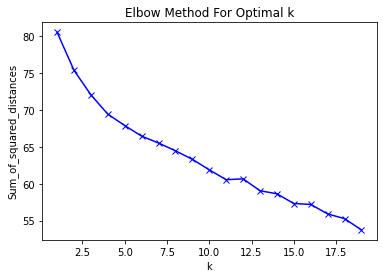

In [88]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [89]:
# set number of clusters
kclusters = 11

london_grouped_clustering = london_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([ 8,  7,  3,  4,  7,  2,  2,  2,  8, 10])

In [90]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

london_merged = london_neighbourhoods

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
london_merged = london_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Location')

london_merged.head() # check the last columns!

,Location,London borough,Postcode district,Dial code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbey Wood,"Bexley, Greenwich [7]",SE2,020,51.48648031512,0.10859224316653,8.0,Newsagent,Indian Restaurant,IT Services,Grocery Store,Food Truck,Field,Ethiopian Restaurant,Event Service,Event Space,Exhibit
1,Acton,"Ealing, Hammersmith and Fulham[8]","W3, W4",020,51.51058775877,-0.26498902668911,7.0,Pub,Park,Gym / Fitness Center,Grocery Store,Playground,Train Station,Mini Golf,Supermarket,Bakery,Creperie
2,Addington,Croydon[8],CR0,020,51.362931128458,-0.026373738779412,3.0,Forest,Park,Zoo,Filipino Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm
3,Addiscombe,Croydon[8],CR0,020,51.381621885559,-0.068682165650808,4.0,Grocery Store,Park,Fast Food Restaurant,Tram Station,Bakery,Indian Restaurant,Pub,Café,Ethiopian Restaurant,Event Service
4,Albany Park,Bexley,"DA5, DA14",020,51.434925966837,0.12492137518833,7.0,Grocery Store,Train Station,Indian Restaurant,Pub,Zoo,Field,Ethiopian Restaurant,Event Service,Event Space,Exhibit


In [91]:
london_merged.dropna(inplace=True)

In [92]:
london_merged['Cluster Labels'] = london_merged['Cluster Labels'].astype(int)

In [93]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [94]:
# create map
map_clusters = folium.Map(location=[51.506932, -0.128211], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['Location'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### cluster 0

In [95]:
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0] + list(range(4, london_merged.shape[1]))]]

,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Becontree,51.548855299106,0.14032294854071,0,Convenience Store,Business Service,Zoo,Fish & Chips Shop,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm
96,Chinbrook,51.431241206527,0.02836005793205,0,Platform,Chinese Restaurant,Fried Chicken Joint,Indian Restaurant,Train Station,Park,Coffee Shop,Farmers Market,Ethiopian Restaurant,Event Service
159,Elmstead,51.415615250805,0.047802531184653,0,Platform,Train Station,Zoo,Field,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant
221,Harold Park,51.600878078321,0.24385171217978,0,Convenience Store,Zoo,Fish & Chips Shop,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market
258,Kenley,51.32363146722,-0.096953941242319,0,Grocery Store,Train Station,Pub,Platform,Fast Food Restaurant,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit
320,New Barnet,51.644079410173,-0.17317778438116,0,Train Station,Construction & Landscaping,Zoo,Filipino Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant
332,North End,51.466925768222,0.1940785449749,0,Train Station,Convenience Store,Café,Platform,Zoo,Field,Event Service,Event Space,Exhibit,Fabric Shop
368,Plumstead,51.486994443033,0.079807547902414,0,Platform,Train Station,Asian Restaurant,Zoo,Field,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant
384,Riddlesdown,51.330820880294,-0.09665628330453,0,Fish & Chips Shop,Train Station,Fountain,Field,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant
406,Slade Green,51.466925768222,0.1940785449749,0,Train Station,Convenience Store,Café,Platform,Zoo,Field,Event Service,Event Space,Exhibit,Fabric Shop


#### cluster 1

In [96]:
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0] + list(range(4, london_merged.shape[1]))]]

,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Barnsbury,51.544315180742,-0.11948881944234,1,Café,Coffee Shop,Brewery,Grocery Store,Rental Car Location,Bus Stop,Pub,Soccer Field,Breakfast Spot,Nightclub
34,Bedford Park,51.499738990538,-0.261078776597,1,Bakery,Café,Gastropub,Gas Station,Bus Stop,French Restaurant,Food Court,Food Stand,Exhibit,Fabric Shop
36,Bellingham,51.425835096297,-0.023664524359907,1,Café,Supermarket,Fish & Chips Shop,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market
37,Belmont,51.601300958343,-0.31929235035328,1,Asian Restaurant,Chinese Restaurant,Fish & Chips Shop,Grocery Store,Sports Bar,Train Station,Pharmacy,Café,Platform,Playground
38,Belmont,51.343282789388,-0.20239373761433,1,Asian Restaurant,Chinese Restaurant,Fish & Chips Shop,Grocery Store,Sports Bar,Train Station,Pharmacy,Café,Platform,Playground
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,West Norwood,51.427025059692,-0.095538300748832,1,Brewery,Park,Pub,Café,Fish & Chips Shop,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm
510,Westcombe Park,51.483582954149,0.017719240550751,1,Fried Chicken Joint,Bus Stop,Train Station,Japanese Restaurant,Park,Restaurant,Café,Doner Restaurant,Field,Event Space
512,Whetstone,51.626106042645,-0.1738998394411,1,Pub,Coffee Shop,Brazilian Restaurant,Park,Mediterranean Restaurant,Pharmacy,Turkish Restaurant,Café,Zoo,Fast Food Restaurant
520,Wood Green,51.598234191309,-0.11726233728737,1,Café,Indian Restaurant,Park,Gastropub,Restaurant,Bakery,Train Station,Light Rail Station,Playground,Bar


#### cluster 2

In [97]:
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0] + list(range(4, london_merged.shape[1]))]]

,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Aldborough Hatch,51.585577492045,0.098742119839992,2,Steakhouse,Zoo,Fish & Chips Shop,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market
6,Aldgate,51.51488143102,-0.078904677469267,2,Coffee Shop,Hotel,Cocktail Bar,Gym / Fitness Center,Restaurant,Middle Eastern Restaurant,Pizza Place,Salad Place,Sandwich Place,Café
7,Aldwych,51.512815974418,-0.11790391775668,2,Theater,Coffee Shop,Pub,French Restaurant,Hotel,Burger Joint,Gelato Shop,Tea Room,Restaurant,Steakhouse
11,Aperfield,51.3077839281,0.042998225145357,2,Chinese Restaurant,Supermarket,Coffee Shop,Zoo,Filipino Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant
16,Balham,51.445919082922,-0.15231567003301,2,Coffee Shop,Pub,Indian Restaurant,Pizza Place,Bakery,Italian Restaurant,Supermarket,Sandwich Place,Bar,Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,Woodford Green,51.604816569782,0.027422103793002,2,Italian Restaurant,Theater,Coffee Shop,Zoo,Filipino Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant
526,Woolwich,51.496234488147,0.065821080670888,2,Pier,Hotel,Clothing Store,Fountain,Café,Steakhouse,Boat or Ferry,Supermarket,Park,Chinese Restaurant
527,Worcester Park,51.375348602793,-0.2413698232129,2,Supermarket,Pizza Place,Convenience Store,Pharmacy,Pet Store,Fast Food Restaurant,BBQ Joint,Portuguese Restaurant,Pub,Grocery Store
529,Yeading,51.530409425123,-0.39398974116165,2,Chinese Restaurant,Pharmacy,Electronics Store,Bus Stop,Zoo,Field,Event Service,Event Space,Exhibit,Fabric Shop


#### cluster 3

In [98]:
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0] + list(range(4, london_merged.shape[1]))]]

,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Addington,51.362931128458,-0.026373738779412,3,Forest,Park,Zoo,Filipino Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm
140,Dulwich,51.435540807248,-0.066408818698341,3,Forest,Zoo,Fish & Chips Shop,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market


#### cluster 4

In [99]:
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[0] + list(range(4, london_merged.shape[1]))]]

,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Addiscombe,51.381621885559,-0.068682165650808,4,Grocery Store,Park,Fast Food Restaurant,Tram Station,Bakery,Indian Restaurant,Pub,Café,Ethiopian Restaurant,Event Service
10,Angel,51.381621885559,-0.068682165650808,4,Grocery Store,Park,Fast Food Restaurant,Tram Station,Bakery,Indian Restaurant,Pub,Café,Ethiopian Restaurant,Event Service
15,Arnos Grove,51.616437796515,-0.13095383637584,4,Chinese Restaurant,Grocery Store,Bus Stop,Park,Beer Bar,Metro Station,Zoo,Field,Exhibit,Fabric Shop
20,Barkingside,51.585834576632,0.084318501011481,4,Supermarket,Soccer Field,Park,Sandwich Place,Café,Metro Station,Pizza Place,Zoo,Event Space,Exhibit
42,Berrylands,51.393962552416,-0.28377898444486,4,Gym / Fitness Center,Park,Bus Stop,Filipino Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm
48,Blackfen,51.450796236782,0.092554730796747,4,Photography Lab,Construction & Landscaping,Pub,Park,Hotel,Zoo,Fast Food Restaurant,Ethiopian Restaurant,Event Service,Event Space
70,Brunswick Park,51.623071182615,-0.15235150409989,4,Park,Construction & Landscaping,Bus Stop,Café,Zoo,Filipino Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant
71,Bulls Cross,51.677341971725,-0.0604655426856,4,Trail,Park,Pub,Garden,Soccer Field,Fast Food Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
72,Burnt Oak,51.609447364243,-0.26122257329866,4,Fried Chicken Joint,Bakery,Indian Restaurant,Park,Filipino Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant
79,Canning Town,51.514959076464,0.023429406147334,4,Café,Convenience Store,Construction & Landscaping,Park,Fish & Chips Shop,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm


#### cluster 5

In [100]:
london_merged.loc[london_merged['Cluster Labels'] == 5, london_merged.columns[[0] + list(range(4, london_merged.shape[1]))]]

,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Arkley,51.644964139189,-0.23095693973422,5,Flower Shop,Golf Course,Zoo,Filipino Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm
193,Grange Park,51.649270645846,-0.10358428760776,5,Golf Course,Cheese Shop,Dance Studio,Zoo,Filipino Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm
225,Harrow on the Hill,51.565556580967,-0.3350389337569,5,Golf Course,Zoo,Filipino Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market


#### cluster 6

In [101]:
london_merged.loc[london_merged['Cluster Labels'] == 6, london_merged.columns[[0] + list(range(4, london_merged.shape[1]))]]

,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
106,Collier Row,51.593250366377,0.1712853751578,6,Park,Zoo,Filipino Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market
139,Downham,51.425346778414,0.0050835921432374,6,Park,Gift Shop,Zoo,Field,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm
190,Goodmayes,51.558362925388,0.11191567771255,6,Park,Pizza Place,Zoo,Escape Room,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm
201,Hackney Marshes,51.557274930103,-0.032397820079217,6,Park,Bakery,Athletics & Sports,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm
210,Hampstead Garden Suburb,51.581172349959,-0.1757016998127,6,Park,Photography Lab,Bookstore,Zoo,Filipino Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm
215,Hanworth,51.431344343281,-0.38307991983437,6,Park,Pharmacy,Grocery Store,Zoo,Escape Room,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant
229,Havering-atte-Bower,51.619936814567,0.18700563126649,6,Park,Electronics Store,Zoo,Escape Room,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm
248,Horn Park,51.446591866313,0.024722880374447,6,Gym / Fitness Center,Park,Field,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm
328,Noak Hill,51.61912200959,0.23030532140434,6,Trail,Park,Fried Chicken Joint,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm
484,Wallington,51.364832488567,-0.14265228848943,6,Park,Zoo,Filipino Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market


#### cluster 7

In [102]:
london_merged.loc[london_merged['Cluster Labels'] == 7, london_merged.columns[[0] + list(range(4, london_merged.shape[1]))]]

,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Acton,51.51058775877,-0.26498902668911,7,Pub,Park,Gym / Fitness Center,Grocery Store,Playground,Train Station,Mini Golf,Supermarket,Bakery,Creperie
4,Albany Park,51.434925966837,0.12492137518833,7,Grocery Store,Train Station,Indian Restaurant,Pub,Zoo,Field,Ethiopian Restaurant,Event Service,Event Space,Exhibit
12,Archway,51.571733703245,-0.14721859874434,7,Pub,Indian Restaurant,Coffee Shop,Historic Site,Deli / Bodega,Plaza,Pizza Place,Seafood Restaurant,Park,Café
17,Bankside,51.498917399067,-0.092542901279123,7,Pub,Argentinian Restaurant,Coffee Shop,Park,Café,Garden,Theater,Residential Building (Apartment / Condo),Pizza Place,Shoe Store
24,Barnet Gate,51.642419944402,-0.24117292734748,7,Forest,Pub,Zoo,Filipino Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant
55,Botany Bay,51.676600869592,-0.12558503092193,7,Sports Club,Pub,Farmers Market,Zoo,Filipino Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop
59,Brentford,51.486911040481,-0.30621760843756,7,Pub,Bus Stop,Hotel,Café,Rental Car Location,Boat or Ferry,Market,Grocery Store,Gym,Turkish Restaurant
62,Brimsdown,51.659715089629,-0.027963364818559,7,Furniture / Home Store,Gym,Pub,Fast Food Restaurant,Filipino Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop
81,Carshalton,51.36526178431,-0.16992931754142,7,Pub,Platform,Hotel,Train Station,Lake,Soccer Field,Grocery Store,Spa,Flower Shop,Farm
92,Chelsfield,51.357547016783,0.12708368929084,7,Health & Beauty Service,Pub,Zoo,Field,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant


#### cluster 8

In [103]:
london_merged.loc[london_merged['Cluster Labels'] == 8, london_merged.columns[[0] + list(range(4, london_merged.shape[1]))]]

,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbey Wood,51.48648031512,0.10859224316653,8,Newsagent,Indian Restaurant,IT Services,Grocery Store,Food Truck,Field,Ethiopian Restaurant,Event Service,Event Space,Exhibit
8,Alperton,51.537972630034,-0.29278706020275,8,Food Truck,Indian Restaurant,Carpet Store,Supermarket,Zoo,Field,Event Service,Event Space,Exhibit,Fabric Shop
40,Belvedere,51.485695884867,0.15176767207278,8,Indian Restaurant,Fast Food Restaurant,Zoo,Filipino Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant
117,Cranham,51.564385763964,0.27091246782567,8,Fast Food Restaurant,Grocery Store,Restaurant,Indian Restaurant,Park,Zoo,Ethiopian Restaurant,Event Service,Event Space,Exhibit
167,Falconwood,51.45978176733,0.092965729269496,8,Indian Restaurant,Construction & Landscaping,Business Service,Zoo,Fish & Chips Shop,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant
250,Hounslow,51.466895455693,-0.35302954924595,8,Indian Restaurant,Warehouse Store,Asian Restaurant,Grocery Store,Dessert Shop,Restaurant,Portuguese Restaurant,Zoo,Farm,Falafel Restaurant
263,Kenton,51.583118659518,-0.30552945266002,8,Indian Restaurant,Park,Bus Stop,Pizza Place,Fast Food Restaurant,Zoo,Field,Event Service,Event Space,Exhibit
287,Little Ilford,51.550147922997,0.068262698603003,8,Fried Chicken Joint,Grocery Store,Indian Restaurant,Ice Cream Shop,Filipino Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant
298,Manor Park,51.550401140202,0.053850008722762,8,Restaurant,Indian Restaurant,Home Service,Zoo,Filipino Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop
299,Marks Gate,51.593780646982,0.14243441225349,8,Event Space,Bowling Alley,Indian Restaurant,Fast Food Restaurant,Zoo,Fish Market,Exhibit,Fabric Shop,Falafel Restaurant,Farm


#### cluster 9

In [104]:
london_merged.loc[london_merged['Cluster Labels'] == 9, london_merged.columns[[0] + list(range(4, london_merged.shape[1]))]]

,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
67,Bromley Common,51.383491137805,0.0334337523685,9,Home Service,Zoo,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farm


#### cluster 10

In [105]:
london_merged.loc[london_merged['Cluster Labels'] == 10, london_merged.columns[[0] + list(range(4, london_merged.shape[1]))]]

,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Anerley,51.408581417837,-0.067546374056709,10,Grocery Store,Train Station,Hardware Store,Park,Zoo,Fast Food Restaurant,Event Service,Event Space,Exhibit,Fabric Shop
13,Ardleigh Green,51.583457049708,0.21412321181411,10,Gym / Fitness Center,Grocery Store,Bar,Pub,Sandwich Place,Fast Food Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit
21,Barnehurst,51.458475637436,0.16488243565265,10,Pet Store,Grocery Store,Golf Course,Café,Zoo,Field,Event Space,Exhibit,Fabric Shop,Falafel Restaurant
25,"Barnet (also Chipping Barnet, High Barnet)",51.644525326713,-0.20206699265882,10,Yoga Studio,Electronics Store,Grocery Store,Construction & Landscaping,Filipino Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant
32,Becontree Heath,51.563020422779,0.15253078865076,10,Grocery Store,Turkish Restaurant,Golf Course,Supermarket,Gym / Fitness Center,Zoo,Fast Food Restaurant,Event Service,Event Space,Exhibit
47,Biggin Hill,51.312451659027,0.033161047242568,10,Grocery Store,Construction & Landscaping,Supermarket,Pool,Zoo,Filipino Restaurant,Event Service,Event Space,Exhibit,Fabric Shop
93,Chessington,51.363655603367,-0.30214979871936,10,Grocery Store,Breakfast Spot,Platform,Train Station,Fast Food Restaurant,Fish & Chips Shop,Food Stand,Forest,French Restaurant,Fountain
108,Colney Hatch,51.610535323671,-0.15574912076303,10,Grocery Store,Indoor Play Area,Dessert Shop,Supermarket,Fish & Chips Shop,Coffee Shop,Playground,Forest,Italian Restaurant,Residential Building (Apartment / Condo)
147,East Finchley,51.590159119794,-0.17534170177071,10,Grocery Store,Pub,Italian Restaurant,Bus Stop,Bakery,Pizza Place,Zoo,Field,Event Service,Event Space
157,Elm Park,51.547789358264,0.19796722111621,10,Grocery Store,Bakery,Pizza Place,Coffee Shop,Fast Food Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop


## Using Cosine Similarity to recommend a London location

In [106]:
london_grouped.head()

,Neighborhood,Zoo Exhibit,Acai House,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,...,Whisky Bar,Windmill,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo
0,Abbey Wood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,Acton,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0
2,Addington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,Addiscombe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,Albany Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
paris_grouped.head()

,Neighborhood,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,10th,0.0,0.000000,0.02,0.00,0.0,0.0,0.0,0.01,0.000000,...,0.010000,0.0,0.020000,0.0,0.0,0.010000,0.000000,0.020000,0.000000,0.0
1,11th,0.0,0.011905,0.00,0.00,0.0,0.0,0.0,0.00,0.011905,...,0.000000,0.0,0.023810,0.0,0.0,0.023810,0.035714,0.000000,0.011905,0.0
2,12th,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.00,0.000000,...,0.022727,0.0,0.000000,0.0,0.0,0.022727,0.022727,0.000000,0.000000,0.0
3,13th,0.0,0.000000,0.00,0.02,0.0,0.0,0.0,0.00,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.060000,0.000000,0.000000,0.000000,0.0
4,14th,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.00,0.000000,...,0.000000,0.0,0.019231,0.0,0.0,0.019231,0.019231,0.019231,0.000000,0.0


In [115]:
# how many columns are in paris data but not in london data
init = 0
for col in paris_grouped.columns:
    if col not in london_grouped.columns:
        init += 1
    
print(init)

22


In [116]:
# how many columns are in london data but not in paris data
init = 0
for col in london_grouped.columns:
    if col not in paris_grouped.columns:
        init += 1
    
print(init)

220


In [121]:
# add the missing columns to the london_grouped dataframe
london_cosine = london_grouped.copy()

init = 0
# columns in paris data but not in london data
for col in paris_grouped.columns:
    if col not in london_grouped.columns:
        init += 1
        london_cosine[col] = paris_grouped[col] # add the missing column to the newly created london DF
    
print(init)
london_cosine.head()

22


,Neighborhood,Zoo Exhibit,Acai House,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,...,Jewish Restaurant,Korean BBQ Restaurant,Lyonese Bouchon,Resort,Shanxi Restaurant,Southwestern French Restaurant,Taiwanese Restaurant,Tattoo Parlor,Tibetan Restaurant,Venezuelan Restaurant
0,Abbey Wood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.01,0.000000,0.0,0.0,0.0,0.0
1,Acton,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0
2,Addington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0
3,Addiscombe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0
4,Albany Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.019231,0.0,0.0,0.0,0.0


In [122]:
# add the missing columns to the paris_grouped dataframe
paris_cosine = paris_grouped.copy()

init = 0
# columns in paris data but not in london data
for col in london_grouped.columns:
    if col not in paris_grouped.columns:
        init += 1
        paris_cosine[col] = london_grouped[col] # add the missing column to the newly created london DF
    
print(init)
paris_cosine.head()

220


,Neighborhood,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Veterinarian,Video Store,Volleyball Court,Warehouse Store,Whisky Bar,Windmill,Winery,Wings Joint,Xinjiang Restaurant,Zoo
0,10th,0.0,0.000000,0.02,0.00,0.0,0.0,0.0,0.01,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11th,0.0,0.011905,0.00,0.00,0.0,0.0,0.0,0.00,0.011905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12th,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13th,0.0,0.000000,0.00,0.02,0.0,0.0,0.0,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14th,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We want to find similarities between the districts where there are currently restaurants in paris and all districts in london. So we can discard the districts where there are no restaurants for now.

In [155]:
paris_cosine = paris_cosine.loc[(paris_cosine['Neighborhood'] == '7th') | (paris_cosine['Neighborhood'] == '8th')]

In [158]:
paris_cosine

,Neighborhood,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Veterinarian,Video Store,Volleyball Court,Warehouse Store,Whisky Bar,Windmill,Winery,Wings Joint,Xinjiang Restaurant,Zoo
17,7th,0.0,0.0,0.0,0.011628,0.0,0.0,0.0,0.011628,0.023256,...,0.0,0.0,0.0,0.0,0.035714,0.0,0.0,0.0,0.0,0.0
18,8th,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.044118,0.014706,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [159]:
paris_cosine.mean()

Adult Boutique         0.000000
Afghan Restaurant      0.000000
African Restaurant     0.000000
American Restaurant    0.005814
Antique Shop           0.000000
                         ...   
Windmill               0.000000
Winery                 0.000000
Wings Joint            0.000000
Xinjiang Restaurant    0.000000
Zoo                    0.000000
Length: 430, dtype: float64

In [161]:
paris_cosine['Neighborhood'] = 'Target'

,Neighborhood,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Veterinarian,Video Store,Volleyball Court,Warehouse Store,Whisky Bar,Windmill,Winery,Wings Joint,Xinjiang Restaurant,Zoo
17,Target,0.0,0.0,0.0,0.011628,0.0,0.0,0.0,0.011628,0.023256,...,0.0,0.0,0.0,0.0,0.035714,0.0,0.0,0.0,0.0,0.0
18,Target,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.044118,0.014706,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [165]:
paris_cosine = paris_cosine.groupby('Neighborhood').mean().reset_index()

In [166]:
paris_cosine

,Neighborhood,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Veterinarian,Video Store,Volleyball Court,Warehouse Store,Whisky Bar,Windmill,Winery,Wings Joint,Xinjiang Restaurant,Zoo
0,Target,0.0,0.0,0.0,0.005814,0.0,0.0,0.0,0.027873,0.018981,...,0.0,0.0,0.0,0.0,0.017857,0.0,0.0,0.0,0.0,0.0


In [181]:
london_cosine.fillna(0, inplace=True)

In [172]:
# remember the names
london_neighborhood_names = london_cosine['Neighborhood']

In [174]:
# drop the neighborhood names column
london_cosine.drop(columns=['Neighborhood'], inplace=True)

In [176]:
# sort the columns
london_cosine = london_cosine[sorted(london_cosine.columns)]

In [182]:
london_cosine

,Acai House,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,...,Windmill,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [186]:
paris_cosine.fillna(0, inplace=True)

In [187]:
paris_cosine

,Neighborhood,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Veterinarian,Video Store,Volleyball Court,Warehouse Store,Whisky Bar,Windmill,Winery,Wings Joint,Xinjiang Restaurant,Zoo
0,Target,0.0,0.0,0.0,0.005814,0.0,0.0,0.0,0.027873,0.018981,...,0.0,0.0,0.0,0.0,0.017857,0.0,0.0,0.0,0.0,0.0


In [188]:
# drop the names column
paris_cosine.drop(columns=['Neighborhood'], inplace=True)

In [189]:
# sort the columns
paris_cosine = paris_cosine[sorted(paris_cosine.columns)]

In [190]:
paris_cosine

,Acai House,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,...,Windmill,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005814,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
from sklearn.metrics.pairwise import cosine_similarity

In [192]:
sim_array = cosine_similarity(london_cosine, paris_cosine)
max_value = np.max(sim_array)

In [193]:
max_value

0.7458292110252849

In [204]:
sim_list = []
for i, n in enumerate(sim_array):
    sim_list.append(n[0])

In [206]:
sim_df = pd.DataFrame()
sim_df['sim_score'] = sim_list
sim_df

,sim_score
0,0.024763
1,0.053199
2,0.013851
3,0.099672
4,0.034542
...,...
513,0.269795
514,0.078454
515,0.026280
516,0.012387


In [211]:
sim_df.reset_index(inplace=True)

In [213]:
sim_df.sort_values(by='sim_score', ascending=False)

,index,sim_score
290,290,0.745829
399,399,0.573289
18,18,0.481356
136,136,0.455025
454,454,0.445481
...,...,...
392,392,0.000000
89,89,0.000000
87,87,0.000000
80,80,0.000000


Now we locate the neighbourhood with the highest similarity score.

In [217]:
london_grouped.iloc[290]['Neighborhood']

'Mayfair'

Bordering leafy Hyde Park, Mayfair is an upscale district of elegant Georgian townhouses, exclusive hotels, and gourmet restaurants. 